**PREDICCCION DERRAME CEREBRAL**

El problema que se espera resolver es poder generar un modelo de aprendizaje supervisado de clasificación que permita predecir el riesgo que tiene una persona en su vida diaria de sufrir un derrame cerebral a partir del análisis de diferentes características personales y de salud de la misma como se pudo verificar anteriormente, y así poder tomar medidas para mejorar alguno de los parámetros descritos que lo catalogan entre ese grupo de persona con riesgo, algo que permita concientizar de igual manera a las personas sobre el peligro en el que se pueden encontrar debido a esto, en donde se le dé una prioridad a la salud de la persona con respecto a algunos cambios en su vida personal para no presentarse en el grupo de riesgo conocido como stroke (derrame cerebral).

**Inicialización librerias**

In [204]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn import metrics
sb.set(style="darkgrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from termcolor import colored

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
#print("No Warning Shown")

**Lectura de datos**

In [152]:
stroke_data = pd.read_csv('Data/full_data.csv')
stroke_data.head(-1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4975,Male,31.0,0,0,No,Private,Urban,215.07,32.7,smokes,0
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0


**Cambiar nombre columna**

In [153]:
stroke_data = stroke_data.rename(columns={'stroke' : 'Derrame'})
stroke_data.head(-1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Derrame
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4975,Male,31.0,0,0,No,Private,Urban,215.07,32.7,smokes,0
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0


**Asignación con junto etiquetas y características**

Separación en valores binarios de características textuales

In [154]:
target = 'Derrame'
X = stroke_data.loc[:,stroke_data.columns!=target]
y = stroke_data.loc[:,stroke_data.columns==target]
columnas = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columnas])

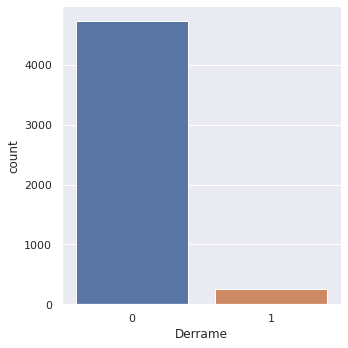

In [155]:
#ax = sns.countplot(x=target,data=stroke_data)
#print(stroke_data[target].value_counts())

sb.catplot('Derrame',data=stroke_data,kind="count", aspect=1)

In [249]:
print(stroke_data.groupby('smoking_status').size())

smoking_status
Unknown            1500
formerly smoked     867
never smoked       1838
smokes              776
dtype: int64


***Particición por defecto conjunto de validación y entrenamiento***

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#partición del conjunto de muestras en validación y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(3735, 19)
(1246, 19)




1.   Regresión logística
2.   Knn
3.   svm
4.   Arbol decision
5.   Random forest

Metricas:
1. Accuracy (ACC)
2. roc_auc
3. MCC
4. F1 score




**Función cálculo de parámetros**

In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

def run_model(model, X_train, y_train, X_test, y_test):
  #Entrenamiento del modelo especificado y predicción
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  #Accuracy metric
  accuracy = accuracy_score(y_test, y_pred)
  #ROC AUC metric
  roc_auc = roc_auc_score(y_test, y_pred) 
  #MCC Metric
  MCC = matthews_corrcoef(y_test, y_pred)
  #F1 score metric
  F1 = f1_score(y_test, y_pred, average='micro')

  model_ev = pd.DataFrame({'Metric': ['ACC','ROC AUC','MCC','f1 score'],
                           'Score': [accuracy,roc_auc,MCC,F1]})

  print("Accuracy = {}".format(accuracy))
  print("ROC Area under Curve = {}".format(roc_auc))
  print("MCC = {}".format(MCC))
  print("F1 SCORE = {}".format(F1))
  print("-------------------------------")
  print("\n")
      
  return model, accuracy, roc_auc, MCC, F1, model_ev

***REGRESION LOGISTICA***

Logistic Regression Metrics:
Accuracy = 0.9526484751203852
ROC Area under Curve = 0.5
MCC = 0.0
F1 SCORE = 0.9526484751203852
-------------------------------




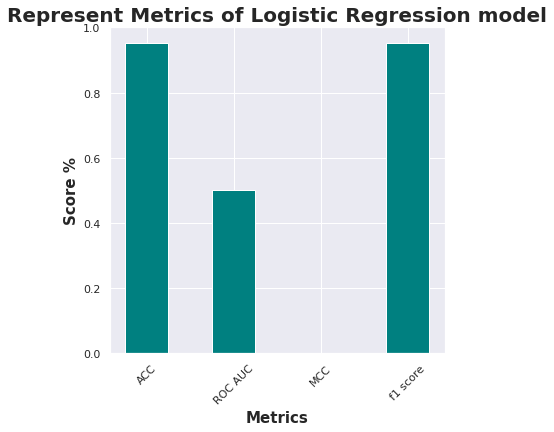

In [200]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(penalty='l2',max_iter=1000, C=1000,random_state=0)
print('Logistic Regression Metrics:')
model_LR, accuracy_LR, roc_auc_LR, MCC_LR, F1_LR, model_ev_LR = run_model(model_LR, X_train, y_train, X_test, y_test)
#Visualize
plt.figure(figsize=(6,6))
plt.title("Represent Metrics of Logistic Regression model", fontweight = 'bold', fontsize = 20)
plt.ylabel("Score %", fontweight = 'bold', fontsize = 15)
plt.xlabel("Metrics", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=45)
plt.bar(model_ev_LR['Metric'],model_ev_LR['Score'], color ='teal', width = 0.5)
plt.show()


***SVM***

SMV LINEAL METRICS
Accuracy = 0.9526484751203852
ROC Area under Curve = 0.5
MCC = 0.0
F1 SCORE = 0.9526484751203852
-------------------------------


SMV POLINOMIAL METRICS
Accuracy = 0.9454253611556982
ROC Area under Curve = 0.5123156226350435
MCC = 0.0514854507927018
F1 SCORE = 0.9454253611556982
-------------------------------


SMV RBF METRICS
Accuracy = 0.9510433386837881
ROC Area under Curve = 0.4991575400168492
MCC = -0.008939339966957898
F1 SCORE = 0.9510433386837881
-------------------------------




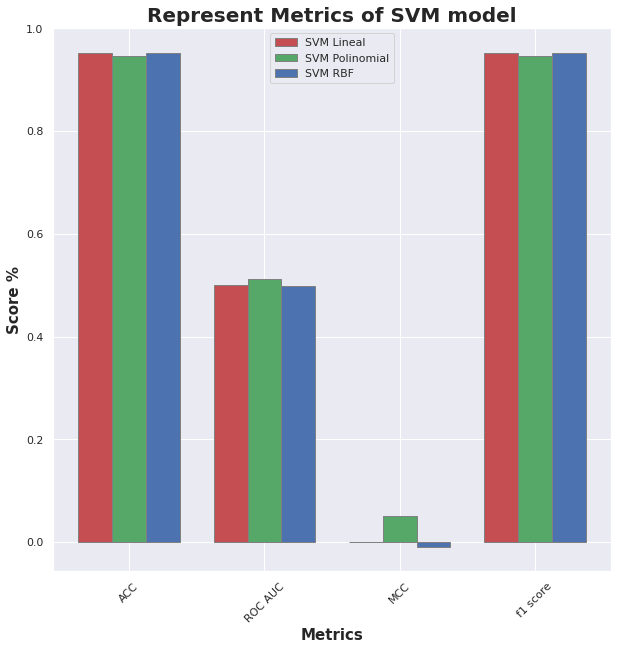

In [176]:
from sklearn import svm
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#SVM LINEAL
Kernel=0
model_svm_lineal = svm.SVC(kernel=kernels[Kernel],gamma=0.01)
print('SMV LINEAL METRICS')
model_svm_lineal, accuracy_svm_lineal, roc_auc_svm_lineal, MCC_svm_lineal, F1_svm_lineal, model_ev_svm_lineal = run_model(model_svm_lineal, X_train, y_train, X_test, y_test)

#SVM POLINOMIAL CUADRATICO
Kernel=1
model_svm_C = svm.SVC(kernel=kernels[Kernel],degree=4,coef0=1)
print('SMV POLINOMIAL METRICS')
model_svm_C, accuracy_svm_C, roc_auc_svm_C, MCC_svm_C, F1_svm_C, model_ev_svm_C = run_model(model_svm_C, X_train, y_train, X_test, y_test)

#SVM RBF
Kernel=2
model_svm_RBF = svm.SVC(kernel=kernels[Kernel],gamma=(1/30)*100)
print('SMV RBF METRICS')
model_svm_RBF, accuracy_svm_RBF, roc_auc_svm_RBF, MCC_svm_RBF, F1_svm_RBF, model_ev_svm_RBF = run_model(model_svm_RBF, X_train, y_train, X_test, y_test)

#Visualize
# set width of bar
barWidth = 0.25
plt.figure(figsize=(10,10))
plt.title("Represent Metrics of SVM model", fontweight = 'bold', fontsize = 20)
plt.xticks(rotation=45)

# Set position of bar on X axis
br1 = np.arange(len(model_ev_svm_lineal['Score']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, model_ev_svm_lineal['Score'], color ='r', width = barWidth,
		edgecolor ='grey', label ='SVM Lineal')
plt.bar(br2, model_ev_svm_C['Score'], color ='g', width = barWidth,
		edgecolor ='grey', label ='SVM Polinomial')
plt.bar(br3, model_ev_svm_RBF['Score'], color ='b', width = barWidth,
		edgecolor ='grey', label ='SVM RBF')

# Adding Xticks
plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Score %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(model_ev_svm_lineal['Score']))],
		['ACC','ROC AUC','MCC','f1 score'])
plt.legend()
plt.show()


***Decision Tree***

Decision Tree Metrics:
Accuracy = 0.9109149277688604
ROC Area under Curve = 0.5264161181157454
MCC = 0.050833689692238455
F1 SCORE = 0.9109149277688604
-------------------------------




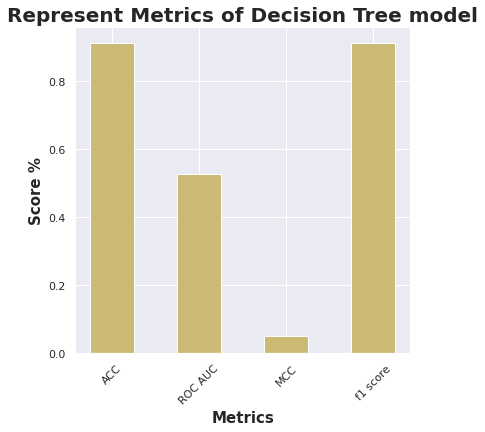

In [201]:
_

***Random forest***

Random Forest Metrics:
Accuracy = 0.9518459069020867
ROC Area under Curve = 0.5076321162880356
MCC = 0.0661500456500721
F1 SCORE = 0.9518459069020866
-------------------------------




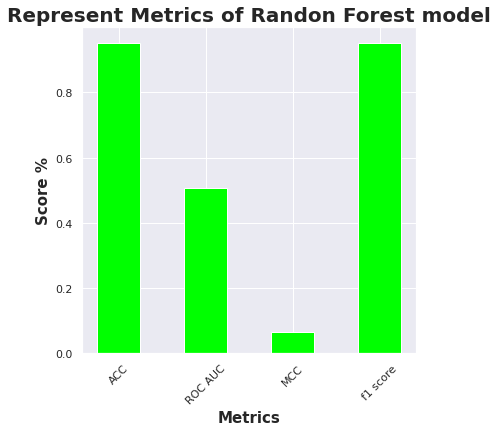

In [203]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0)
print('Random Forest Metrics:')
model_RF, accuracy_RF, roc_auc_RF, MCC_RF, F1_RF, model_ev_RF = run_model(model_RF, X_train, y_train, X_test, y_test)
#Visualize
plt.figure(figsize=(6,6))
plt.title("Represent Metrics of Randon Forest model", fontweight = 'bold', fontsize = 20)
plt.ylabel("Score %", fontweight = 'bold', fontsize = 15)
plt.xlabel("Metrics", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=45)
plt.bar(model_ev_RF['Metric'],model_ev_RF['Score'], color ='lime', width = 0.5)
plt.show()

***KNN***

In [217]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, int(np.sqrt(len(y_train))))
print(k_range)
distance='minkowski'#podemos hacer un for que recorra las distancias que queremos probar en un enfoque grid-search.

accuracy_knn=[]
roc_auc_knn=[]
MCC_knn=[]
F1_knn=[]

for k in k_range:#por ahora variemos K, 
    model_knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    model_knn.fit(X_train, y_train)
    y_pred=model_knn.predict(X_test)

    #Accuracy metric
    accuracy_knn.append(accuracy_score(y_test, y_pred))
    #ROC AUC metric
    roc_auc_knn.append(roc_auc_score(y_test, y_pred)) 
    #MCC Metric
    MCC_knn.append(matthews_corrcoef(y_test, y_pred))
    #F1 score metric
    F1_knn.append(f1_score(y_test, y_pred, average='micro'))

range(1, 61)


Max Accuracy: 0.9526484751203852


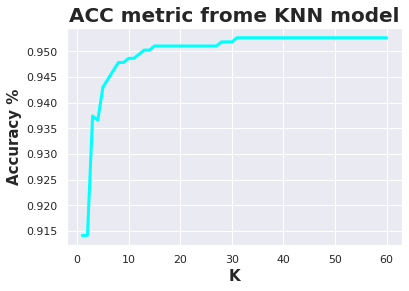

Max AUC ROC: 0.511994345522825


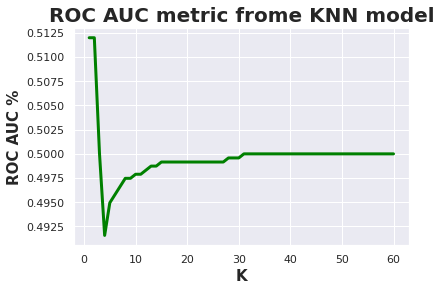

Max MCC: 0.024591805893777397


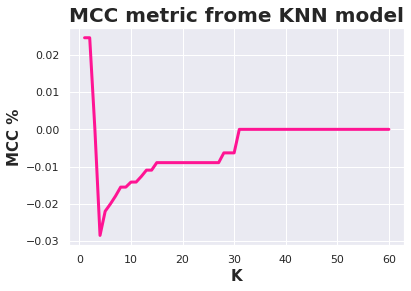

Max f1 score: 0.9526484751203852


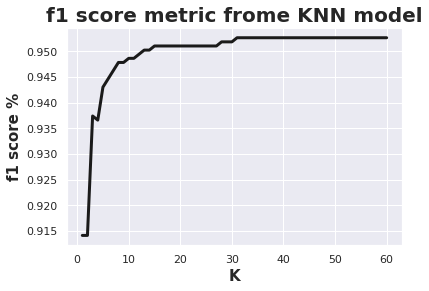

In [231]:
#Comaparación mejor k accuracy
#print(accuracy_knn)
print("Max Accuracy:", max(accuracy_knn))
plt.figure()
plt.plot(k_range, accuracy_knn, color='aqua',lw=3)
plt.xlabel('K', fontweight = 'bold', fontsize = 15)
plt.ylabel('Accuracy %', fontweight = 'bold', fontsize = 15)
plt.title('ACC metric frome KNN model', fontweight = 'bold', fontsize = 20)
plt.show()

#Comaparación mejor k ROC AUC
#print(roc_auc_knn)
print("Max AUC ROC:", max(roc_auc_knn))
plt.figure()
plt.plot(k_range, roc_auc_knn, color='green',lw=3)
plt.xlabel('K', fontweight = 'bold', fontsize = 15)
plt.ylabel('ROC AUC %', fontweight = 'bold', fontsize = 15)
plt.title('ROC AUC metric frome KNN model', fontweight = 'bold', fontsize = 20)
plt.show()

#Comaparación mejor k MCC
#print(MCC_knn)
print("Max MCC:", max(MCC_knn))
plt.figure()
plt.plot(k_range, MCC_knn, color='deeppink',lw=3)
plt.xlabel('K', fontweight = 'bold', fontsize = 15)
plt.ylabel('MCC %', fontweight = 'bold', fontsize = 15)
plt.title('MCC metric frome KNN model', fontweight = 'bold', fontsize = 20)
plt.show()

#Comaparación mejor k MCC
#print(F1_knn)
print("Max f1 score:", max(F1_knn))
plt.figure()
plt.plot(k_range, F1_knn, color='k',lw=3)
plt.xlabel('K', fontweight = 'bold', fontsize = 15)
plt.ylabel('f1 score %', fontweight = 'bold', fontsize = 15)
plt.title('f1 score metric frome KNN model', fontweight = 'bold', fontsize = 20)
plt.show()


***Analisis del mejor k***

KNN Metrics:
Accuracy = 0.9526484751203852
ROC Area under Curve = 0.5
MCC = 0.0
F1 SCORE = 0.9526484751203852
-------------------------------




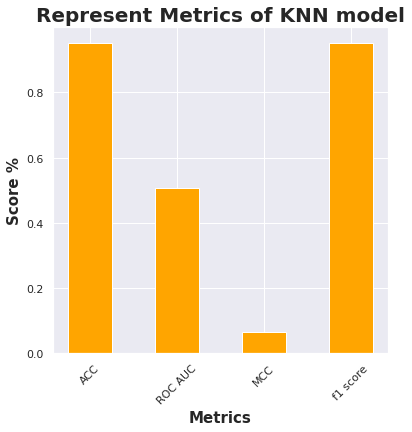

In [250]:
from sklearn.neighbors import KNeighborsClassifier
distance='minkowski'#podemos hacer un for que recorra las distancias que queremos probar en un enfoque grid-search.

model_knn = KNeighborsClassifier(n_neighbors = 32,weights='distance',metric=distance, metric_params=None,algorithm='brute')
print('KNN Metrics:')
model_knn, accuracy_knn, roc_auc_knn, MCC_knn, F1_knn, model_ev_knn = run_model(model_knn, X_train, y_train, X_test, y_test)

#Visualize
plt.figure(figsize=(6,6))
plt.title("Represent Metrics of KNN model", fontweight = 'bold', fontsize = 20)
plt.ylabel("Score %", fontweight = 'bold', fontsize = 15)
plt.xlabel("Metrics", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=45)
plt.bar(model_ev_RF['Metric'],model_ev_RF['Score'], color ='orange', width = 0.5)
plt.show()


**Comparacion de modelos**

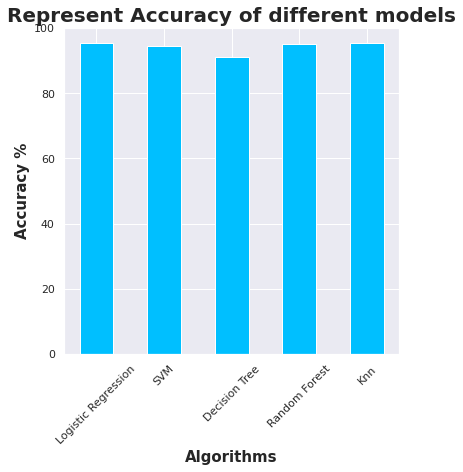

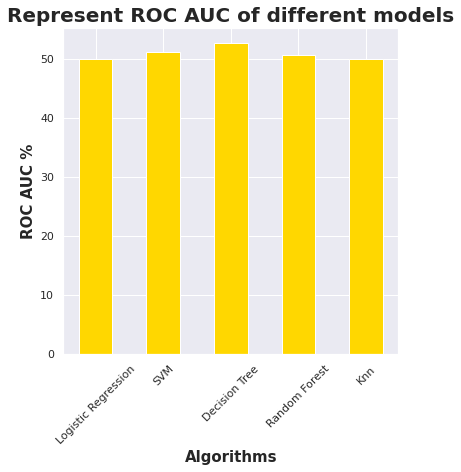

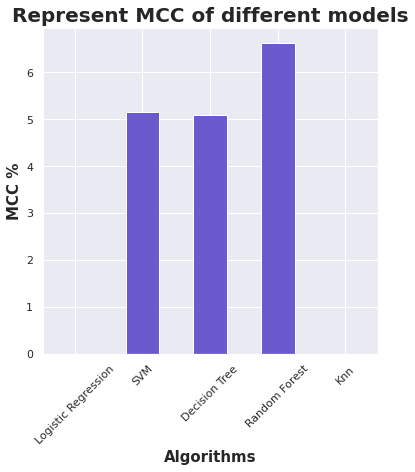

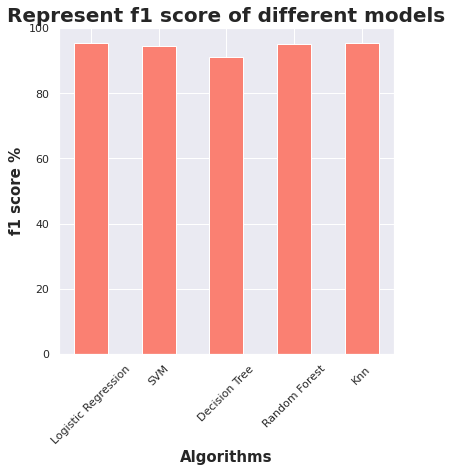

In [251]:
model_ev_1 = pd.DataFrame({'Model': ['Logistic Regression','SVM','Decision Tree','Random Forest','Knn'], 
                         'Accuracy': [accuracy_LR*100,accuracy_svm_C*100,accuracy_DT*100,accuracy_RF*100,accuracy_knn*100]})

#Visualize
plt.figure(figsize=(6,6))
plt.title("Represent Accuracy of different models", fontweight = 'bold', fontsize = 20)
plt.ylabel("Accuracy %", fontweight = 'bold', fontsize = 15)
plt.xlabel("Algorithms", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=45)
plt.bar(model_ev_1['Model'],model_ev_1['Accuracy'], color ='deepskyblue', width = 0.5)
plt.show()
print("\n")
##########################################################################################################################
model_ev_2 = pd.DataFrame({'Model': ['Logistic Regression','SVM','Decision Tree','Random Forest','Knn'], 
                         'ROC_AUC': [roc_auc_LR*100,roc_auc_svm_C*100,roc_auc_DT*100,roc_auc_RF*100,roc_auc_knn*100]})

#Visualize
plt.figure(figsize=(6,6))
plt.title("Represent ROC AUC of different models", fontweight = 'bold', fontsize = 20)
plt.ylabel("ROC AUC %", fontweight = 'bold', fontsize = 15)
plt.xlabel("Algorithms", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=45)
plt.bar(model_ev_2['Model'],model_ev_2['ROC_AUC'], color ='gold', width = 0.5)
plt.show()
print("\n")
##########################################################################################################################
model_ev_3 = pd.DataFrame({'Model': ['Logistic Regression','SVM','Decision Tree','Random Forest','Knn'], 
                         'MCC': [MCC_LR*100,MCC_svm_C*100,MCC_DT*100,MCC_RF*100,MCC_knn*100]})

#Visualize
plt.figure(figsize=(6,6))
plt.title("Represent MCC of different models", fontweight = 'bold', fontsize = 20)
plt.ylabel("MCC %", fontweight = 'bold', fontsize = 15)
plt.xlabel("Algorithms", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=45)
plt.bar(model_ev_3['Model'],model_ev_3['MCC'], color ='slateblue', width = 0.5)
plt.show()
print("\n")
##########################################################################################################################
model_ev_4 = pd.DataFrame({'Model': ['Logistic Regression','SVM','Decision Tree','Random Forest','Knn'], 
                         'f1 score': [F1_LR*100,F1_svm_C*100,F1_DT*100,F1_RF*100,F1_knn*100]})

#Visualize
plt.figure(figsize=(6,6))
plt.title("Represent f1 score of different models", fontweight = 'bold', fontsize = 20)
plt.ylabel("f1 score %", fontweight = 'bold', fontsize = 15)
plt.xlabel("Algorithms", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=45)
plt.bar(model_ev_4['Model'],model_ev_4['f1 score'], color ='salmon', width = 0.5)
plt.show()